In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
org_data=pd.read_csv("/content/Country-data.csv")
org_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data = org_data.iloc[:,1:]
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
data.isna().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:

# Calculate the z-scores
z_scores = np.abs((data - data.mean()) / data.std())

threshold = 3

outlier_indices = np.where(z_scores > threshold)

data = data.drop(outlier_indices[0])

data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
161,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(data.values)

In [7]:
x.shape

(153, 9)

### part1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

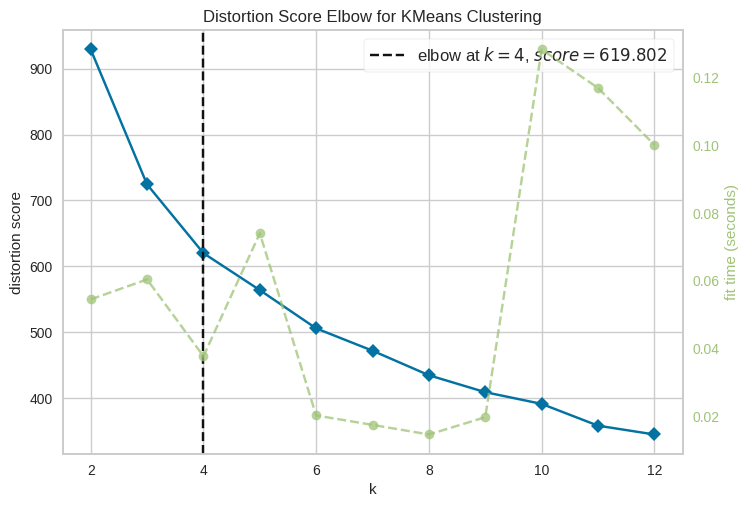

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmean1 = KMeans(init="random")
visualizer = KElbowVisualizer(kmean1, k=(2,13)).fit(x)
visualizer.show()

In [9]:

# k_values = range(1, 12)

# # Initialize an empty list to store the inertia (WCSS) values
# inertia = []

# # Perform K-means clustering for each k value
# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(x)
#     inertia.append(kmeans.inertia_)

# # Plot the WCSS values against k values
# plt.plot(k_values, inertia, 'bx-')
# plt.scatter(k_values, inertia)
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Within-cluster sum of squares (WCSS)')
# plt.title('Elbow Method to Find Optimal k')
# plt.show()


In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


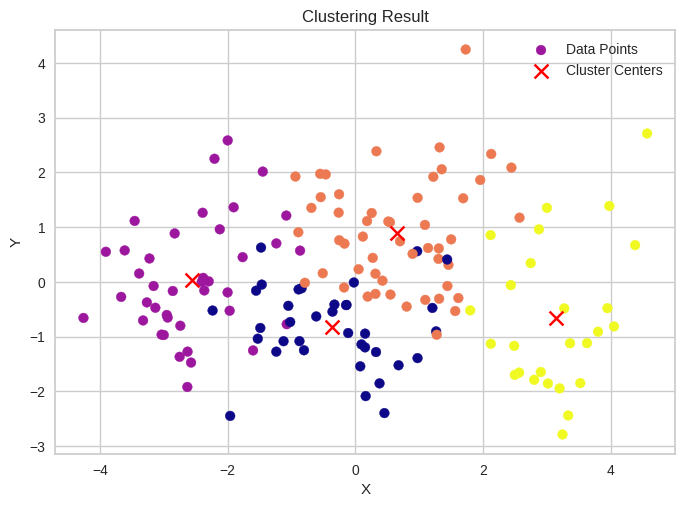

number od unique labels : (array([0, 1, 2, 3], dtype=int32), array([36, 40, 51, 26]))
SSE : 619.8021260481638


In [11]:
kmean1_1 = KMeans(n_clusters=4,init="random" , random_state=42)
kmean1_1.fit(x)
labels1_1=kmean1_1.labels_

centers = pca.transform(kmean1_1.cluster_centers_)

plt.scatter(x_pca[:,0],x_pca[:,1],c=labels1_1, cmap='plasma', label='Data Points')
plt.scatter(centers[:,0] , centers[:,1], c='red', marker='x', label='Cluster Centers',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering Result')
plt.legend()
plt.show()
print(f"number od unique labels : {np.unique(labels1_1 , return_counts=True)}")
print(f"SSE : {kmean1_1.inertia_}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


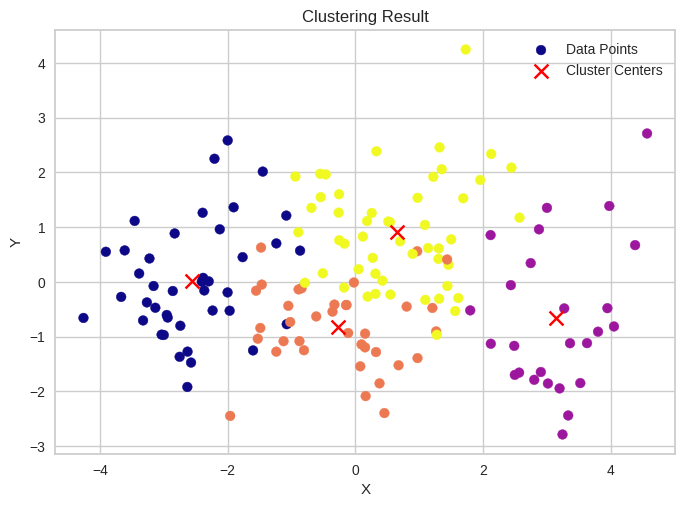

number od unique labels : (array([0, 1, 2, 3], dtype=int32), array([41, 26, 36, 50]))
SSE : 619.9538325218359


In [12]:
kmean1_2 = KMeans(n_clusters=4,init="random" , random_state=10)
kmean1_2.fit(x)
labels1_2=kmean1_2.labels_

centers = pca.transform(kmean1_2.cluster_centers_)

plt.scatter(x_pca[:,0],x_pca[:,1],c=labels1_2, cmap='plasma', label='Data Points')
plt.scatter(centers[:,0] , centers[:,1], c='red', marker='x', label='Cluster Centers',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering Result')
plt.legend()
plt.show()
print(f"number od unique labels : {np.unique(labels1_2 , return_counts=True)}")
print(f"SSE : {kmean1_2.inertia_}")

### part2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

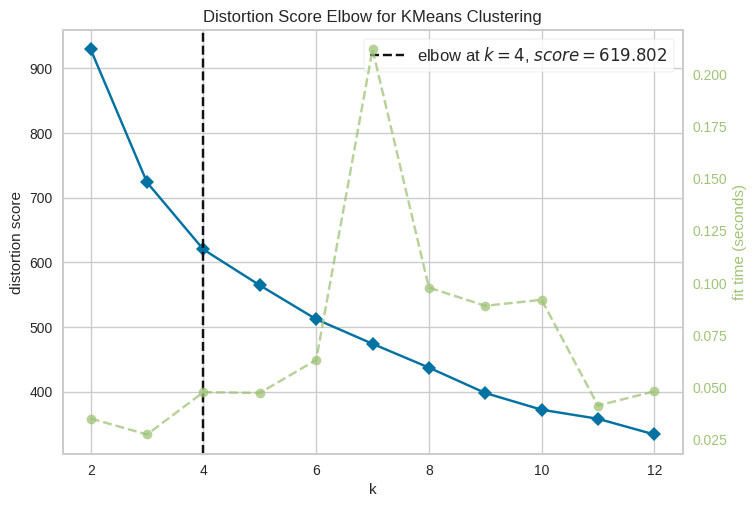

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:

kmean2 = KMeans(init="k-means++")
visualizer = KElbowVisualizer(kmean2, k=(2,13)).fit(x)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


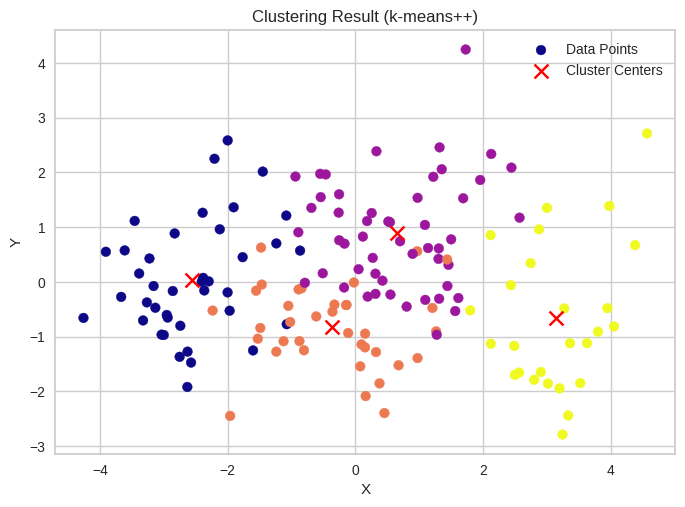

number od unique labels : (array([0, 1, 2, 3], dtype=int32), array([40, 51, 36, 26]))
SSE : 619.8021260481638


In [14]:
kmean2_1 = KMeans(n_clusters=4,init="k-means++" , random_state=42)
kmean2_1.fit(x)
labels2_1=kmean2_1.labels_

centers = pca.transform(kmean2_1.cluster_centers_)

plt.scatter(x_pca[:,0],x_pca[:,1],c=labels2_1, cmap='plasma', label='Data Points')
plt.scatter(centers[:,0] , centers[:,1], c='red', marker='x', label='Cluster Centers',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering Result (k-means++)')
plt.legend()
plt.show()
print(f"number od unique labels : {np.unique(labels2_1 , return_counts=True)}")
print(f"SSE : {kmean2_1.inertia_}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


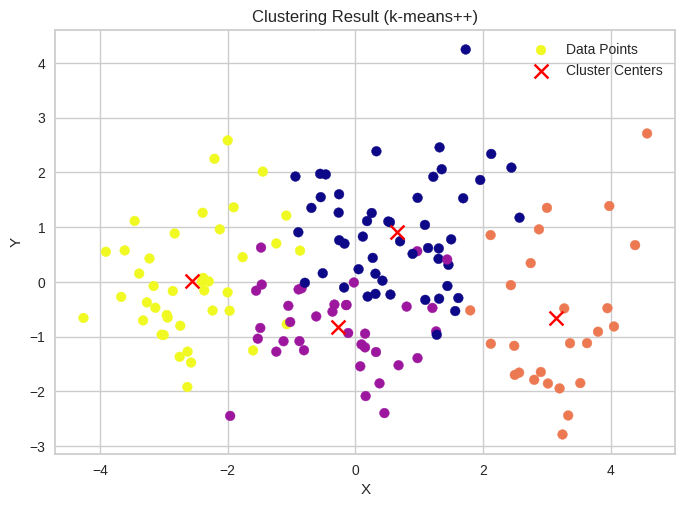

number od unique labels : (array([0, 1, 2, 3], dtype=int32), array([50, 36, 26, 41]))
SSE : 619.9538325218359


In [15]:
kmean2_2 = KMeans(n_clusters=4,init="k-means++" , random_state=10)
kmean2_2.fit(x)
labels2_2=kmean2_2.labels_

centers = pca.transform(kmean2_2.cluster_centers_)

plt.scatter(x_pca[:,0],x_pca[:,1],c=labels2_2, cmap='plasma', label='Data Points')
plt.scatter(centers[:,0] , centers[:,1], c='red', marker='x', label='Cluster Centers',s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering Result (k-means++)')
plt.legend()
plt.show()
print(f"number od unique labels : {np.unique(labels2_2 , return_counts=True)}")
print(f"SSE : {kmean2_2.inertia_}")

###part3

In [16]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import squareform , pdist

distvec = pdist(x)

dist_matrix = squareform(distvec)



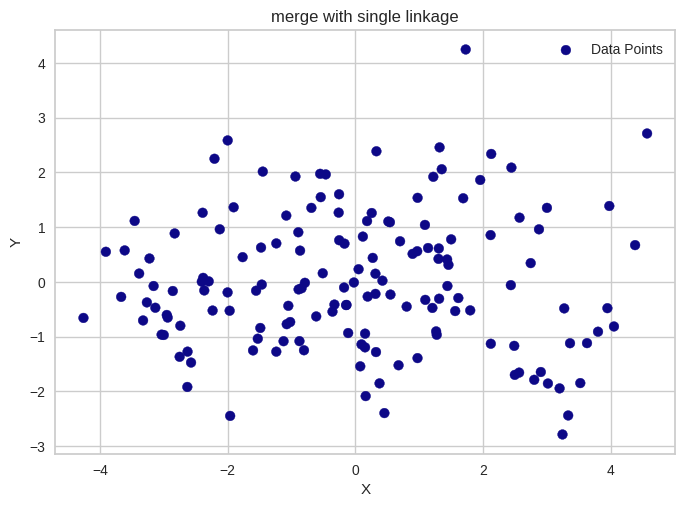

number od unique labels : (array([0], dtype=int32), array([153]))


In [29]:
# Perform agglomerative clustering with single linkage
hac = AgglomerativeClustering(n_clusters=4, linkage='single')
hac_labels = hac.fit_predict(dist_matrix)

# Assign new labels based on single linkage merging
merged_labels = np.zeros_like(labels1_1)
for cluster_idx in np.unique(labels1_1):
    merged_labels[labels1_1 == cluster_idx] = hac_labels[cluster_idx]


plt.scatter(x_pca[:,0],x_pca[:,1],c=merged_labels, cmap='plasma', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('merge with single linkage')
plt.legend()
plt.show()
print(f"number od unique labels : {np.unique(merged_labels , return_counts=True)}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


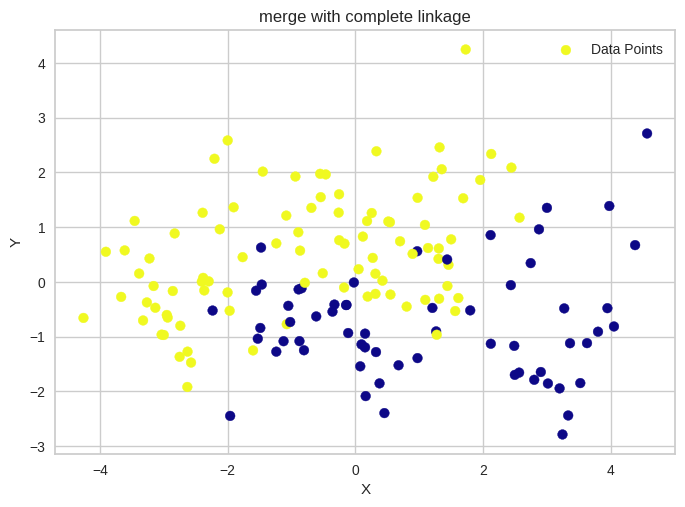

number od unique labels : (array([0, 2], dtype=int32), array([62, 91]))


In [30]:
# Perform agglomerative clustering with single linkage
hac = AgglomerativeClustering(n_clusters=4, linkage='complete')
hac_labels = hac.fit_predict(dist_matrix)

# Assign new labels based on single linkage merging
merged_labels = np.zeros_like(labels1_1)
for cluster_idx in np.unique(labels1_1):
    merged_labels[labels1_1 == cluster_idx] = hac_labels[cluster_idx]


plt.scatter(x_pca[:,0],x_pca[:,1],c=merged_labels, cmap='plasma', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('merge with complete linkage')
plt.legend()
plt.show()
print(f"number od unique labels : {np.unique(merged_labels , return_counts=True)}")

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


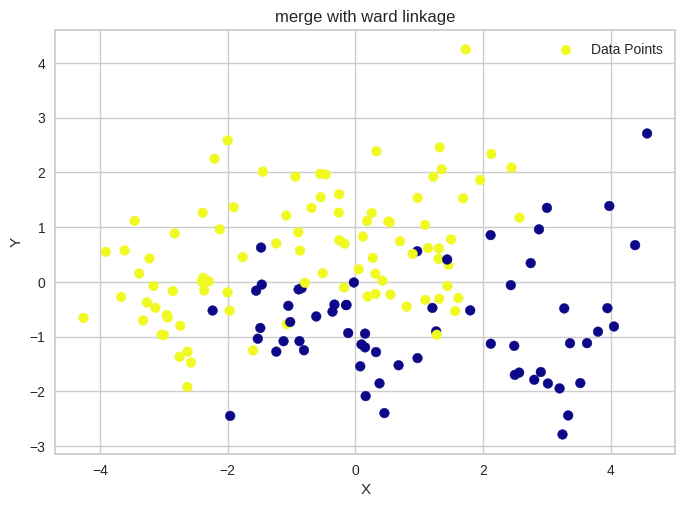

number od unique labels : (array([0, 2], dtype=int32), array([62, 91]))


In [31]:
# Perform agglomerative clustering with single linkage
hac = AgglomerativeClustering(n_clusters=4, linkage='ward')
hac_labels = hac.fit_predict(dist_matrix)

# Assign new labels based on single linkage merging
merged_labels = np.zeros_like(labels1_1)
for cluster_idx in np.unique(labels1_1):
    merged_labels[labels1_1 == cluster_idx] = hac_labels[cluster_idx]


plt.scatter(x_pca[:,0],x_pca[:,1],c=merged_labels, cmap='plasma', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('merge with ward linkage')
plt.legend()
plt.show()
print(f"number od unique labels : {np.unique(merged_labels , return_counts=True)}")

### part4

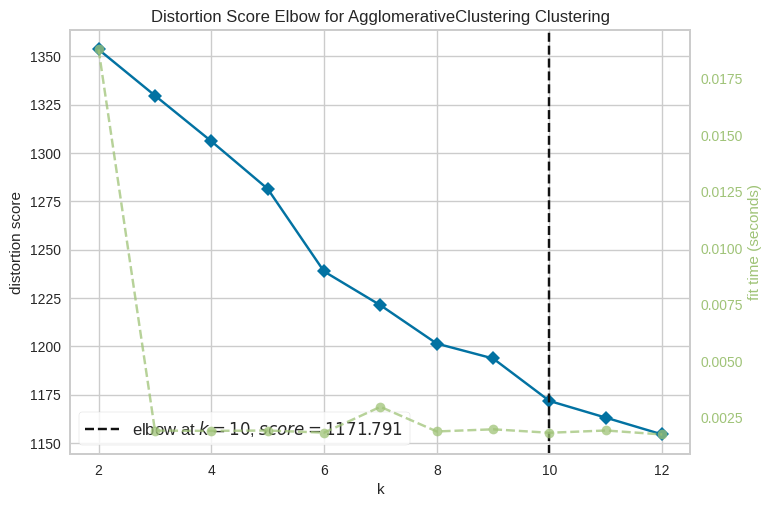

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from sklearn.cluster import AgglomerativeClustering
hac1 = AgglomerativeClustering(linkage = "single")
visualizer1 = KElbowVisualizer(hac1, k=(2,13)).fit(x)
visualizer1.show()


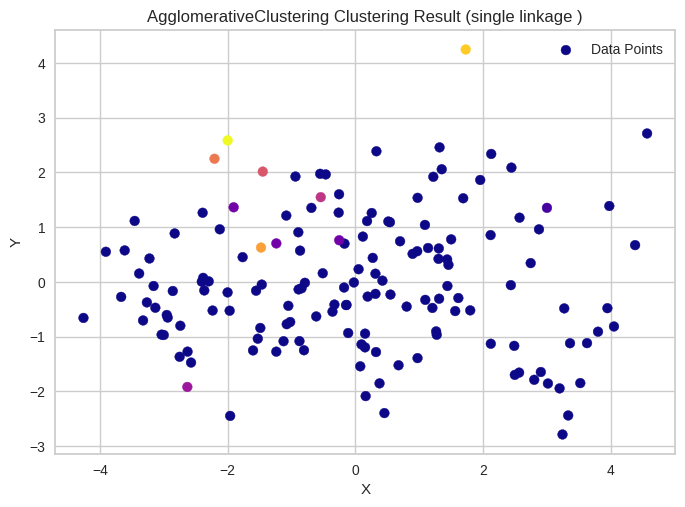

number od unique labels : (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([142,   1,   3,   1,   1,   1,   1,   1,   1,   1]))


In [21]:
hac1_1 = AgglomerativeClustering(n_clusters=10,linkage = "single")
hac1_1.fit(x)
labels_hac1=hac1_1.labels_


plt.scatter(x_pca[:,0],x_pca[:,1],c=labels_hac1, cmap='plasma', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('AgglomerativeClustering Clustering Result (single linkage )')
plt.legend()
plt.show()
print(f"number od unique labels : {np.unique(labels_hac1 , return_counts=True)}")

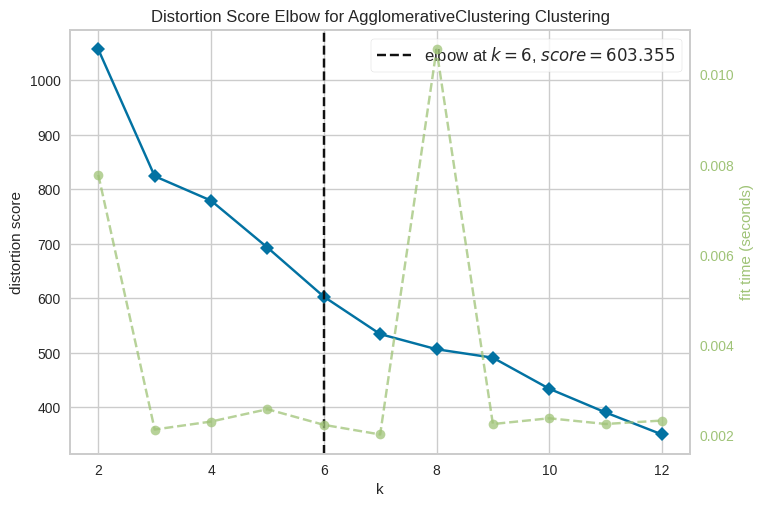

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
hac2 = AgglomerativeClustering(linkage = "complete")
visualizer2 = KElbowVisualizer(hac2, k=(2,13)).fit(x)
visualizer2.show()

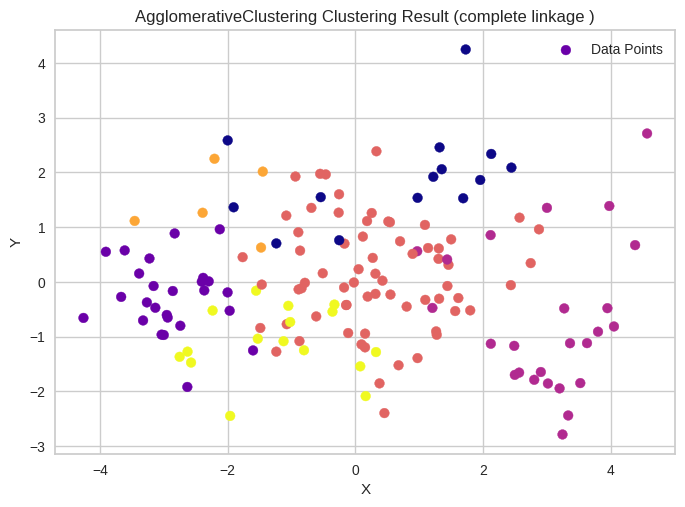

number od unique labels : (array([0, 1, 2, 3, 4, 5]), array([14, 26, 25, 67,  5, 16]))


In [23]:
hac2_1 = AgglomerativeClustering(n_clusters=6,linkage = "complete")
hac2_1.fit(x)
labels_hac2=hac2_1.labels_


plt.scatter(x_pca[:,0],x_pca[:,1],c=labels_hac2, cmap='plasma', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('AgglomerativeClustering Clustering Result (complete linkage )')
plt.legend()
plt.show()
print(f"number od unique labels : {np.unique(labels_hac2 , return_counts=True)}")

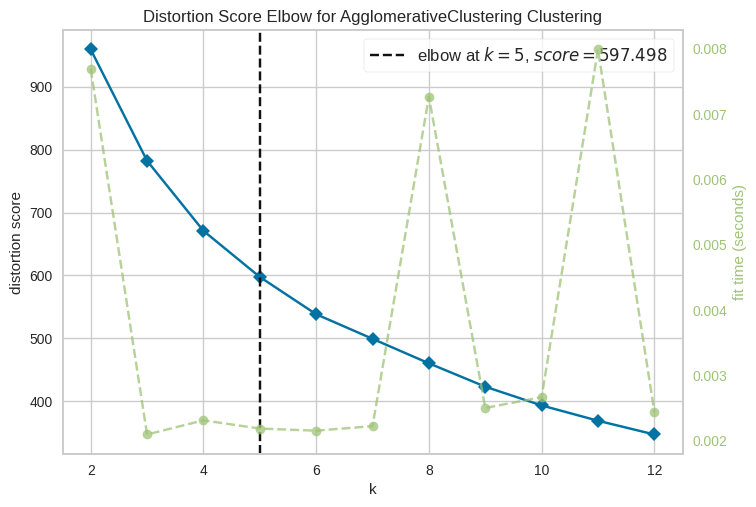

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
hac3 = AgglomerativeClustering(linkage = "ward")
visualizer3 = KElbowVisualizer(hac3, k=(2,13)).fit(x)
visualizer3.show()

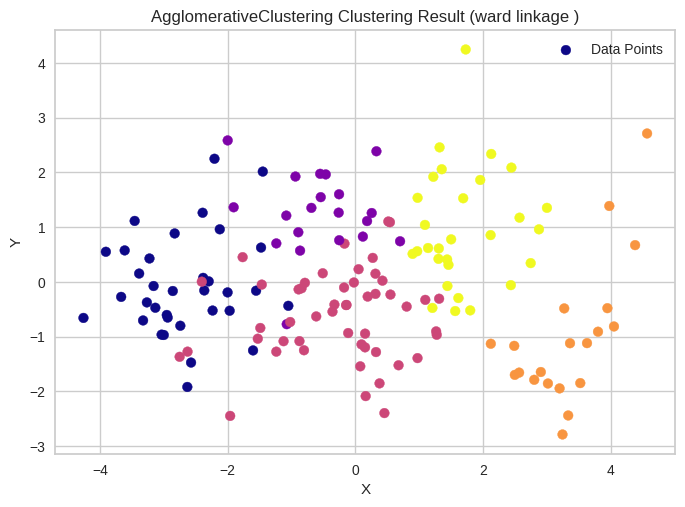

number od unique labels : (array([0, 1, 2, 3, 4]), array([34, 20, 50, 20, 29]))


In [33]:
hac3_1 = AgglomerativeClustering(n_clusters=5,linkage = "ward")
hac3_1.fit(x)
labels_hac3=hac3_1.labels_


plt.scatter(x_pca[:,0],x_pca[:,1],c=labels_hac3, cmap='plasma', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('AgglomerativeClustering Clustering Result (ward linkage )')
plt.legend()
plt.show()
print(f"number od unique labels : {np.unique(labels_hac3 , return_counts=True)}")

In [26]:
df=pd.DataFrame(x)
df.to_csv("preproccessed data.csv",index=False)